# Getting Data: File I/O and APIs

In this lab, we will practice reading data from various kinds of files and ussing the Twitter API.

## Reading Data from a Space-Delimited File

In this example we will download two text files containing data from LOSC (the LIGO Open Science Center). These files are available online: [fig1-observed-H.txt](https://www.gw-openscience.org/s/events/GW150914/P150914/fig1-observed-H.txt) contains data from the LIGO detector in Hanford, Washington and [fig1-observed-L.txt](https://www.gw-openscience.org/s/events/GW150914/P150914/fig1-observed-H.txt) contains data from the detector in Livingston, Louisiana. These data contain the gravitational wave signal from a pair of black holes as they spiraled into each other. Click on either of the two file links above to open the files in your browswer, to see what they contain and how they are formatted. You should see text files containing data in two columns, the first holding time and the second, a measurement of something called strain. Strain is a measure of the percentage change in length of the detector arms caused by the gravitational wave.

Let's read the data from these files into pandas DataFrames.

In [ ]:
import pandas as pd

col_names = ['time', 'strain']

# The first line of the file has column names that contain whitespace
# skiprows=[0] throws out this row

H1Data = pd.read_csv('https://www.gw-openscience.org/s/events/GW150914/P150914/fig1-observed-H.txt', 
                     delim_whitespace=True, skiprows=[0], header=0, names=col_names)
L1Data = pd.read_csv('https://www.gw-openscience.org/s/events/GW150914/P150914/fig1-observed-L.txt', 
                     delim_whitespace=True, skiprows=[0], header=0, names=col_names)

In [ ]:
H1Data.head()

time    strain
0  0.250061  0.015293
1  0.250122  0.006372
2  0.250183 -0.002075
3  0.250244 -0.009889
4  0.250305 -0.016904

The next code block involves some changes that we will make to the Hanford (H1) data so that it lines up with the Livingston (L1) data, making a visual comparision between the two signals easier. The gravitational wave signal arrives at Hanford 6.9 milliseconds after Livingston, due to the location in the sky of the black holes and the fact that gravitational waves travel at the speed of light. Thus we throw out the first 6.9 ms worth of Hanford strain samples and the last 6.9 ms worth of time samples. This effectively shifts the signal while keeping the time and strain data arrays the same length, which will be important for plotting. Finally, we multiply the Hanford data by -1 which accounts for the fact that the two detectors have different arm orientations, so measure signals that are inverted from each other.

In [ ]:
H1_time = H1Data.time
H1_strain = H1Data.strain

L1_time = L1Data.time
L1_strain = L1Data.strain

time_offset = 6.9*1e-3 # GW arrived 6.9 ms later at H1 than L1
sample_offset = int(round(time_offset/(H1_time[1]-H1_time[0])))
H1_time = H1_time[0:len(H1_time)-sample_offset]
H1_strain = -1*H1_strain[sample_offset:len(H1_strain)]

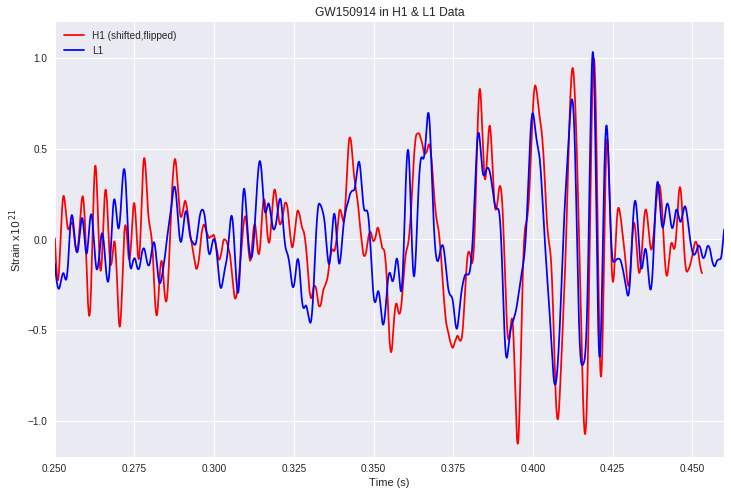

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 

# Make a plot of the data 
plt.figure(figsize=(12, 8))
plt.plot(H1_time, H1_strain, 'r', L1_time, L1_strain, 'b')

# Set the axes limits
axes = plt.gca()
axes.set_xlim([0.25,0.46])
axes.set_ylim([-1.2,1.2])

# Give the plot a title, labels and a legend
plt.title('GW150914 in H1 & L1 Data')
plt.xlabel('Time (s)')
plt.ylabel('Strain x$ 10^{\,21}$')

plt.legend(('H1 (shifted,flipped)','L1'),loc='upper left')

plt.show()

## Reading Data From an Excel File
In this example we will upload an Excel file from your computer, to Azure and then read data from that file.  The file we will use is here: [LIGO_Strain_ASD.xlsx](https://www.andrews.edu/~tzs/Jupyter/LIGO_Strain_ASD.xlsx).  Right click on this link and select "Save Link As".  Save the file on your computer in a location that is easy to find (like your Desktop).  Open the file in Excel and take a look at the contents and formatting.  This time there are 3 columns, the first contains frequency and the second and third contain something called "Amplitude Spectral Density (ASD)" for both Hanford and Livingston data.  The ASD gives a measure of how much signal strength is at each frequency and can tell us some interesting things about detector noise sources.

Read the excel file into a pandas DataFrame.

In [ ]:
LIGOex = pd.read_excel('https://www.andrews.edu/~tzs/Jupyter/LIGO_Strain_ASD.xlsx')
LIGOex.head()

f(Hz)        H1 ASD        L1 ASD
0  0.125  3.557570e-19  2.761198e-19
1  0.250  3.748115e-19  2.956271e-19
2  0.375  2.638521e-19  2.560376e-19
3  0.500  1.268282e-19  1.783549e-19
4  0.625  4.338996e-20  9.562368e-20

In [ ]:
# Pull out the data columns
freq = LIGOex["f(Hz)"]
H1ASD = LIGOex["H1 ASD"]
L1ASD = LIGOex["L1 ASD"]

Finally, the plotting!

Notice that we are making a loglog plot. This is a plot with logarithmic x and y axis, which for this data is the best at showing its features. If you want a plot with just one log axis, you can use the functions semilogx and semilogy.

This plot can be used to look at the noise in the LIGO detectors. Notice the rise in noise in low frequencies below 20 Hz. This is due to thermal noise and ground vibration. There is also a general rise in the noise at high frequencies due to something called shot noise. This has to do with the fact that we are measuring photons, which are discrete packages of light hitting at discrete times, which makes measuring high frequency changes harder. The sharp features are called lines and are due to parts of the instruments vibrating at specific frequencies. See the lines at 60 Hz and multiples of 60 Hz? What (in the US anyway) vibrates at 60 Hz?

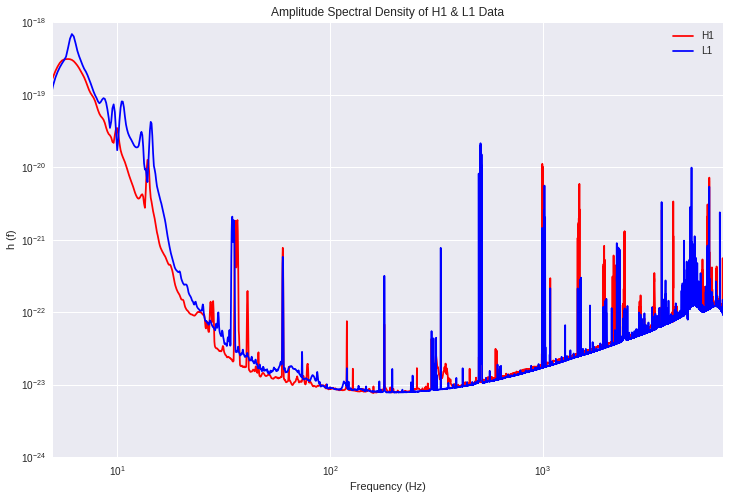

In [ ]:
# Make a plot of the data 
plt.figure(figsize=(12, 8))
plt.loglog(freq, H1ASD, 'r', freq, L1ASD, 'b')

# Set the axes limits
axes = plt.gca()
axes.set_xlim([5,7000])
axes.set_ylim([1e-24,1e-18])

# Give the plot a title, labels and a legend
plt.title('Amplitude Spectral Density of H1 & L1 Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('h (f)')
plt.legend(('H1','L1'),loc='upper right')

plt.show()

twitter_api.json

## Using the Twitter API

The twitter API code is mostly from there examples [here](http://www.ds100.org/sp18/materials_table). First we will need to read in the keys and tokens that are stored in the twitter_api.json file that you created.

In [ ]:
# Uncomment the lines below and run this cell only if you are using Colaboratory
# When prompted, upload your twitter_api.json file

from google.colab import files
uploaded = files.upload()

In [ ]:
import json

key_file = 'twitter_api.json'
with open(key_file) as f:
    auth_keys = json.load(f)

FileNotFoundError: ignored

`auth_keys` is now a dictionary of key-value pairs.  We will inspect its contents by printing out the keys but not the values.  The values, which contain the access tokens should be treated as passwords, not shared and kept in places that only you can access.

In [ ]:
auth_keys.keys()

### Twitter Requests Session
We will use the request `oauth` support to start an Authenticated session:

In [ ]:
from requests_oauthlib import OAuth1Session
session = OAuth1Session(auth_keys["consumer_key"],
                        client_secret=auth_keys["consumer_secret"],
                        resource_owner_key=auth_keys["access_token"],
                        resource_owner_secret=auth_keys["access_secret"])

### The Twitter REST APIs
We want to get all the Tweets from a user. To do this we will use the timeline API:

https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html

Skim the above web page to see how we call this API. What do we need to know:

1. What kind of request (GET, POST, ...)?
2. What are the parameters or data that we should send?
3. What are the returned fields?
4. Rate limits ...

### Getting the Timeline
The following will get the Timeline for `"AndrewsUniv"`

In [ ]:
url = "https://api.twitter.com/1.1/statuses/user_timeline.json"
resp = session.get(url, params={"screen_name": "AndrewsUniv"})
resp

### Examine the Response
What is its format?

In [ ]:
dict(resp.headers)

In [ ]:
resp.content

### Parsing the JSON Content
The response is encoded in JSON (see headers or the content). We will use the json parsing library built into python:

In [ ]:
au_tweets = json.loads(resp.content)
au_tweets

How many tweets did we get?

In [ ]:
len(au_tweets)

### Examining a Tweet
1. What fields do we have?
2. What is the recursive structure?

In [ ]:
au_tweets[0]

### Examining First 5 Tweets:
We can loop over the dictionaries and print fields:

In [ ]:
for t in au_tweets[:5]:
    print(t['created_at'])
    print(t['text'], "\n")

### Making a Dataframe
Pandas can build a DataFrame from the dictionaries and even the raw JSON

In [ ]:
import pandas as pd
df = pd.DataFrame(au_tweets)
df.head()

In [ ]:
import pandas as pd
df = pd.read_json(resp.content)
df.head()

### Getting Lots of Tweets
The Twitter API limits how many tweets you can obtain in a single request to 200 tweets. Therefore to go back in time you need to repeatedly call requesting earlier tweets than the oldest tweet you have. This will return 200 more tweets that are at least as old (including the oldest tweet again ...).

This is an excellent example of being stateless. The Twitter Server does not need to remember which tweets it sent us. Instead we tell it where to start reading in each request.

The following block of code iterates until no new Tweets are returned.

In [ ]:
pd.to_datetime(au_tweets[0]['created_at'])

In [ ]:
def get_timeline(session, screen_name):
    """
    Constructs a dictionary of all available tweets from a given screen name.
    session: a request session that has been auntheticated 
    screen_name: the screen name from which to get the timeline
    
    returns: a list all tweets
    """
    url = "https://api.twitter.com/1.1/statuses/user_timeline.json"
    tweets = {}
    # Make an initial request
    resp = session.get(url, params = {"screen_name": screen_name, "count": 200})
    old_tweetid_len = -1
    # Loop while the response is OK and we are still getting new tweets
    while resp.ok and old_tweetid_len < len(tweets):
        new_tweets = {t['id']: t for t in json.loads(resp.content)}
        old_tweetid_len = len(tweets)
        tweets.update(new_tweets)
        min_id = min(tweets.keys())
        resp = session.get(url, params = {"screen_name": screen_name, "count": 200, "max_id": min_id})
        print("Oldest Tweet:", tweets[min_id]['created_at'], "\"", tweets[min_id]["text"], "\"")
    return list(tweets.values())

In [ ]:
all_au_tweets = get_timeline(session, "AndrewsUniv")

### Construct a DataFrame from the Tweets
Make a DataFrame that contains a subset of the tweet information and add the length of the tweets.

In [ ]:
df = pd.DataFrame(all_au_tweets)[['id', 'created_at', 'text']]
df['created_at'] = pd.to_datetime(df['created_at'])
df['len'] = df['text'].str.len()
df = df.sort_values("created_at", ascending=False)
df.head()

In [ ]:
len(df)

In [ ]:
# Task 1: Enter code to display the first 10 tweets ever tweeted by the AndrewsUniv account
display(df.tail(10))

In [ ]:
# Task 2: Enter code to calculate and display the average text length of an AndrewsUniv tweet

df1 = df.drop(['id', 'created_at', 'text'], axis=1)

df1.mean()

len    102.793725
dtype: float64

In [ ]:
# Task 3: Enter code to display the text from the 10 most recent tweets by a twitter account
# of your choice (other than AndrewsUniv)

url = "https://api.twitter.com/1.1/statuses/user_timeline.json"
resp = session.get(url, params={"screen_name": "SpencervilleSDA"})
resp

resp.content

my_tweets = json.loads(resp.content)
my_tweets


mydf = pd.DataFrame(my_tweets)
mydf.head()

def get_timeline(session, screen_name):
   
    url = "https://api.twitter.com/1.1/statuses/user_timeline.json"
    tweets = {}
    # Make an initial request
    resp = session.get(url, params = {"screen_name": screen_name, "count": 200})
    old_tweetid_len = -1
    # Loop while the response is OK and we are still getting new tweets
    while resp.ok and old_tweetid_len < len(tweets):
        new_tweets = {t['id']: t for t in json.loads(resp.content)}
        old_tweetid_len = len(tweets)
        tweets.update(new_tweets)
        min_id = min(tweets.keys())
        resp = session.get(url, params = {"screen_name": screen_name, "count": 200, "max_id": min_id})
        print("Oldest Tweet:", tweets[min_id]['created_at'], "\"", tweets[min_id]["text"], "\"")
    return list(tweets.values())


NameError: ignored

In [ ]:
all_my_tweets = get_timeline(session, "PaulKagame")

df = pd.DataFrame(all_my_tweets)[['id', 'created_at', 'text']]
df['created_at'] = pd.to_datetime(df['created_at'])
df['len'] = df['text'].str.len()
df = df.sort_values("created_at", ascending=False)
df.head(10)

Oldest Tweet: Mon Mar 14 14:22:43 +0000 2016 " @TheEconomist  there are even more dangers in not harnessing the potential of L.Kivu. That is the bigger problem! "
Oldest Tweet: Wed Oct 23 10:32:30 +0000 2013 " Many Thanks to every one of You for the good Wishes..#BDay! "
Oldest Tweet: Fri Nov 02 09:57:44 +0000 2012 " @howden_africa ..Economist..u ref.to!?? "
Oldest Tweet: Mon Apr 02 11:47:38 +0000 2012 " @i_am_yosia. Whoever talks of betrayal is a joker...! Nothing would even remotely suggest so-just cant happen! Just need to have facts "
Oldest Tweet: Tue Dec 13 16:53:08 +0000 2011 " @LucyMbabazi. I am yet to know/to be told about the perfect person,we have in this world....! "
Oldest Tweet: Sun Oct 23 16:00:36 +0000 2011 " @OgOfficial. Thank you "
Oldest Tweet: Wed Oct 12 15:45:14 +0000 2011 " @ManziBerry Easy-come over,will give u the ride,thanks! "
Oldest Tweet: Fri Aug 12 23:24:31 +0000 2011 " @ramaisibo ...only advising that there is a better way of contributing to the debate(tha

id          created_at  \
0  1094940663953661953 2019-02-11 12:46:11   
1  1094940661458046976 2019-02-11 12:46:11   
2  1094940658987614208 2019-02-11 12:46:10   
3  1091216049289261056 2019-02-01 06:05:54   
4  1085613945476575233 2019-01-16 19:05:08   
5  1077355546276216832 2018-12-25 00:09:13   
6  1066706402817818624 2018-11-25 14:53:19   
7  1064166588767772673 2018-11-18 14:41:00   
8  1060921665138409472 2018-11-09 15:46:50   
9  1060920913326157826 2018-11-09 15:43:51   

                                                text  len  
0  I warmly congratulate our new Chair, my brothe...  138  
1  Africa is moving even faster towards fulfillin...  140  
2  It was an honor to serve the people and leader...  140  
3  To ALL the heroes of our Country and Struggle....  140  
4  President @UKenyatta, my thoughts and prayers ...  140  
5  A Merry Christmas to you all. Wishing you a pr...  115  
6  Quite unhealthy among other things. Includes u...  140  
7  I pay tribute to Africa’s leaders who unanimou...  140  
8  We also had discussion on geopolitics and impo...   91  
9  Was a pleasure meeting with @KGeorgieva. Enjoy...  140

### Following a Hashtag

In the example below we will display posts containing the `#datascience` hashtag in real time.  We will be using the Twitter filter API that is described here: https://developer.twitter.com/en/docs/tweets/filter-realtime/api-reference/post-statuses-filter.html

Once you run the two cells below, you will start to see the tweets appear in real time.  To stop the flow of tweeets, click on the kernel stop button, next to the run button at the top of the page. (Or the stop button to the left of the code cell if you are using Colaboratory)

In [ ]:
url = "https://stream.twitter.com/1.1/statuses/filter.json"
resp = session.post(url, data={"track": "datascience"}, stream=True)
resp

<Response [200]>

In [ ]:
try:
    for line in resp.iter_lines():
        if len(line) > 0:
            try:
                tweet = json.loads(line)
            except:
                print(line)
            print(tweet['user']['screen_name'], tweet['text'], '\n\n')
except:
    # It is important to close the connections since there is a limit on the number of active sessions.
    print("Closing Connection")
    resp.close()

machinelearn_d RT @nGage_ETx: A Common Trap That Undermines Analytics Credibility https://t.co/Ud9OHzae47 #BigData #DataScience https://t.co/lCrzFcttNl 


KirkDBorne Overview of Adversarial Attacks on Deep #NeuralNetworks: https://t.co/NHolnQViE8 #abdsc 

#BigData #DataScience #AI… https://t.co/AZGAHUHEhz 


machinelearn_d RT @aadrake: Machine Learning and AI using Microsoft Cognitive Services https://t.co/bxu3WEEafy #data #bigdata #ai #ml #datascience 


machinelearn_d RT @DS_Analytics: Tata AIA banks on data analytics, credit bureaus to issue policies - The Hindu BusinessLine https://t.co/sVXPAdt1h9

#Dat… 


machinelearn_d RT @iamChuckRussell: Interesting... The Most Important Numpy Functions You Should Know When Learning Python - Analytics India Magazine

#py… 


botgopher RT @gp_pulipaka: #DeepLearning Identifies Depression in Speech Patterns. #BigData #Analytics #MachineLearning #DataScience #AI #IoT #IIoT #… 


botgopher RT @gp_pulipaka: A Framework for Implementing Federated Le

It is important to make sure that we close the stream, especially if we used the stop button to halt the streaming.

In [ ]:
resp.close()

### Using Twython

Thus far, we have been interacting with the Twitter APIs directly.  For many applications, it is simpler to use the Python module called Twython which serves as a wrapper for the APIs.

In [ ]:
# Uncomment and run the line below if you are using Colaboratory

!pip install twython

  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython


In [ ]:
from twython import Twython

twitter = Twython(auth_keys["consumer_key"], auth_keys["consumer_secret"])

Now let's search for recent tweets containing the phrase "data science"

In [ ]:
for status in twitter.search(q='"data science"')["statuses"]:
    user = status["user"]["screen_name"]
    text = status["text"]
    print(user, ':', text, '\n\n')

KirkDBorne : Top Trends in #DataScience to Watch Out For in 2019: https://t.co/aL8EM5xzgf #abdsc #BigData #MachineLearning #AI… https://t.co/VrgPCBTq2f 


RodalLab : RT @gleesonj: Please RT: We have 30 fully-funded PhD studentships in the applied mathematics, statistics and machine learning that is neede… 


PatrickSmoker : RT @McGiveronBRM: Data driven agriculture is here.  Today’s @PurdueAg Data Science/Digital Ag Seminar by Dr Chandra, Microsoft. A full hous… 


Ashot_ : RT @data_minings: Statistics for Data Science and Business Analysis

☞ https://t.co/yeuly6T23J

#bigdata #programming https://t.co/qDlLKaeE… 


rajvarshney : RT @RenuSwarup: A Mission which will be transformative .Using data science to develop India specific prediction models for maternal and chi… 


Cattitude622 : RT @Bangers2012: BERKELEY VIOLENCE

Yesterday, there was a VIOLENT act against a conservative UC Berkeley student. @yuvipanda , who works o… 


KirkDBorne : How the Economics of #DataScience is Creating N

### Streaming with Twython

We will create a class that inherits from `TwythonStreamer` and overwrites its `on_success` and `on_error` methods.  We do this so that we can specify the type of tweets that we collect and the number to gather before disconnecting.

In [ ]:
from twython import TwythonStreamer

tweets = []

class MyStreamer(TwythonStreamer):
    """Modification of TwythonStreamer that specifies how to interact with the stream"""
    
    def on_success(self, data):
        """What to do when twitter sends data. 
        data will be a Python dict representing a tweet"""
        
        if 'text' in data: # We want tweets, not just actions
            # only want english language tweets
            if data['lang'] == 'en':
                tweets.append(data)
                print("received tweet # ", len(tweets))
            
        # stop when we have collected enough
        if len(tweets) >= 50:
            self.disconnect()
            
    def on_error(self, status_code, data):
        print(status_code, " ", data)
        self.disconnect()

Now we will initialize the streamer and start it streaming.

In [ ]:
stream = MyStreamer(auth_keys["consumer_key"], auth_keys["consumer_secret"],
                   auth_keys["access_token"], auth_keys["access_secret"])

# Start streaming data science hashtags
stream.statuses.filter(track='datascience')

received tweet #  1
received tweet #  2
received tweet #  3
received tweet #  4
received tweet #  5
received tweet #  6
received tweet #  7
received tweet #  8
received tweet #  9
received tweet #  10
received tweet #  11
received tweet #  12
received tweet #  13
received tweet #  14
received tweet #  15
received tweet #  16
received tweet #  17
received tweet #  18
received tweet #  19
received tweet #  20
received tweet #  21
received tweet #  22
received tweet #  23
received tweet #  24
received tweet #  25
received tweet #  26
received tweet #  27
received tweet #  28
received tweet #  29
received tweet #  30
received tweet #  31
received tweet #  32
received tweet #  33
received tweet #  34
received tweet #  35
received tweet #  36
received tweet #  37
received tweet #  38
received tweet #  39
received tweet #  40
received tweet #  41
received tweet #  42
received tweet #  43
received tweet #  44
received tweet #  45
received tweet #  46
received tweet #  47
received tweet #  48
r

Insert the tweets into a DataFrame

In [ ]:
dspd = pd.DataFrame(tweets)

In [ ]:
dspd.text.head()

0    RT @AngelHealthTech: 10 Ways to win with Digit...
1    RT @KirkDBorne: Top Trends in #DataScience to ...
2    RT @mvollmer1: Giving machines “common sense” ...
3    RT @MikeQuindazzi: 3 ways #AI impacts #marketi...
4    RT @couponfree01: Udemy Free Discount - The Ja...
Name: text, dtype: object

Next, let us collect a sample of 1,000 tweets made up of a random selection of current, public statuses.  To do this, let us re-define the MyStreamer class to collect 1,000 tweets.

In [ ]:
from twython import TwythonStreamer

tweets = []

class MyStreamer(TwythonStreamer):
    """Modification of TwythonStreamer that specifies how to interact with the stream"""
    
    def on_success(self, data):
        """What to do when twitter sends data. 
        data will be a Python dict representing a tweet"""
        
        if 'text' in data: # We want tweets, not just actions
            # only want english language tweets
            if data['lang'] == 'en':
                tweets.append(data)
                print("received tweet # ", len(tweets))
            
        # stop when we have collected enough
        if len(tweets) >= 1000:
            self.disconnect()
            
    def on_error(self, status_code, data):
        print(status_code, " ", data)
        self.disconnect()

Once again, initialize the streamer and collect the tweets

In [ ]:
stream = MyStreamer(auth_keys["consumer_key"], auth_keys["consumer_secret"],
                   auth_keys["access_token"], auth_keys["access_secret"])

stream.statuses.sample()

received tweet #  1
received tweet #  2
received tweet #  3
received tweet #  4
received tweet #  5
received tweet #  6
received tweet #  7
received tweet #  8
received tweet #  9
received tweet #  10
received tweet #  11
received tweet #  12
received tweet #  13
received tweet #  14
received tweet #  15
received tweet #  16
received tweet #  17
received tweet #  18
received tweet #  19
received tweet #  20
received tweet #  21
received tweet #  22
received tweet #  23
received tweet #  24
received tweet #  25
received tweet #  26
received tweet #  27
received tweet #  28
received tweet #  29
received tweet #  30
received tweet #  31
received tweet #  32
received tweet #  33
received tweet #  34
received tweet #  35
received tweet #  36
received tweet #  37
received tweet #  38
received tweet #  39
received tweet #  40
received tweet #  41
received tweet #  42
received tweet #  43
received tweet #  44
received tweet #  45
received tweet #  46
received tweet #  47
received tweet #  48
r

Let's look at the top hastags in our sample

In [ ]:
from collections import Counter

top_hashtags = Counter(hashtag['text'].lower() 
                      for tweet in tweets
                      for hashtag in tweet["entities"]["hashtags"])

print(top_hashtags.most_common(5))

[('venezuela', 4), ('happybirthdaynani', 4), ('blackpinkinmy', 3), ('blackpinkinkl', 3), ('bestcoversong', 3)]


Suggestion: One thousand tweets is not a super-representative sample.  Increase the number collected to 10,000 and re-run the code above to see what the top hashtags are now. You may want to try this after you have completed the lab since it does take a while to run.

Let us make a bar plot of the collected hashtags.

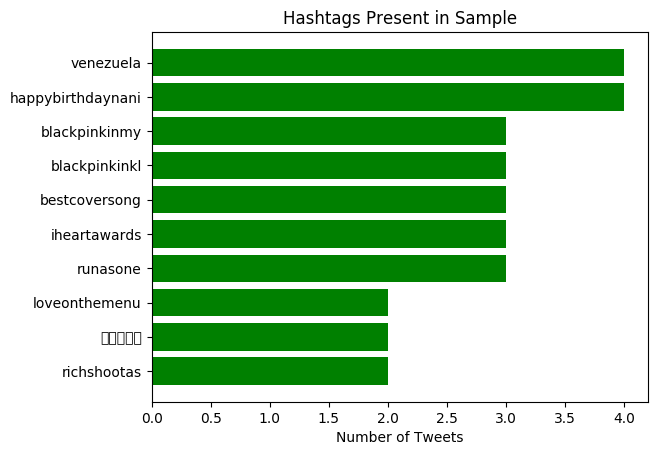

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

top_hashtags_sorted = top_hashtags.most_common(10)
y_labels = [tag for tag, counts in top_hashtags_sorted]
y_pos = np.arange(len(y_labels))
num_hashtags = [counts for tag, counts in top_hashtags_sorted]

ax.barh(y_pos, num_hashtags, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Tweets')
ax.set_title('Hashtags Present in Sample')

plt.show()

In [ ]:
# Task 4: Insert the collected tweets into a DataFrame.  Save the DataFrame to a csv file.

df = pd.DataFrame(tweets)
df.to_csv(index=False)



'contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries\n,,Sun Feb 24 04:11:30 +0000 2019,,"{\'hashtags\': [], \'urls\': [], \'user_mentions\': [{\'screen_name\': \'Rude_Astrology\', \'name\': \'Rude Astrology\', \'id\': 927204517539655680, \'id_str\': \'927204517539655680\', \'indices\': [3, 18]}], \'symbols\': [], \'media\': [{\'id\': 1099451374637666304, \'id_str\': \'1099451374637666304\', \'indices\': [40, 63], \'media_url\': \'http://pbs.twimg.com/media/D0IJMzkX0AAJB7L.jpg\', \'media_url_https\': \'https://pbs.twimg.com/media/D0I

In [ ]:
# Task 5: Enter code to compute the average number of followers of the accounts posting the tweets in 
# your sample.

avefollows = np.mean([userrec.get("followers_count")for userrec in df.user])

print(avefollows)

2646.48
